<b>¡Hola Hiram!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


## sprint 10
## Descripción del proyecto
**Contexto**
Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Descripción de los datos
Datos utilizados en la primera parte del proyecto

`/datasets/hypotheses_us.csv`

Hypotheses: breves descripciones de las hipótesis.
Reach: alcance del usuario, en una escala del uno a diez.
Impact: impacto en los usuarios, en una escala del uno al diez.
Confidence: confianza en la hipótesis, en una escala del uno al diez.
Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.
Datos utilizados en la segunda parte del proyecto

`/datasets/orders_us.csv`

transactionId: identificador de pedido.
visitorId: identificador del usuario que realizó el pedido.
date: fecha del pedido.
revenue: ingresos del pedido.
group: el grupo del test A/B al que pertenece el usuario.
/datasets/visits_us.csv

date: la fecha.
group: grupo de la prueba A/B.
visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.
Asegúrate de preprocesar los datos. Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.

## Priorizar hipótesis

In [1]:
import datetime as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import stats
pd.set_option('display.max_columns', None)

In [2]:
#Priorizar hipótesis
hipotesis=pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [3]:
#calcular ICE y RICE
hipotesis['ICE']=hipotesis['Impact']*hipotesis['Confidence']/hipotesis['Effort']
hipotesis['RICE']=hipotesis['Reach']*hipotesis['Impact']*hipotesis['Confidence']/hipotesis['Effort']

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has calculado correctamente las métricas ICE y RICE, lo cual es fundamental para priorizar las hipótesis de manera efectiva. Esto demuestra un buen entendimiento de cómo evaluar las hipótesis basándose en diferentes criterios. Al calcular estas métricas, has considerado tanto el impacto y la confianza como el esfuerzo y el alcance, lo que te permite tener una visión más completa de la viabilidad y el potencial de cada hipótesis.
</div>


In [4]:
display(hipotesis.sort_values(by='ICE', ascending=False))
display(hipotesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Aunque has mostrado cómo cambian las prioridades al usar RICE en lugar de ICE, sería útil proporcionar una explicación más detallada sobre por qué estos cambios ocurren y cómo el factor 'Reach' influye en el resultado. Al incluir 'Reach', se considera el tamaño del público potencial que podría verse afectado por la hipótesis, lo que puede alterar significativamente la priorización al identificar oportunidades con un mayor alcance.
</div>


In [5]:
#Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. 
#Proporcionar una explicación de los cambios.

## Parte 2. Análisis del test A/B

In [6]:
ordenes=pd.read_csv('/datasets/orders_us.csv')
visitantes=pd.read_csv('/datasets/visits_us.csv')

In [7]:
ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
La inspección inicial de la estructura de datos en la celda de órdenes es completa y bien realizada. Has verificado correctamente los tipos de datos y la ausencia de valores nulos, lo cual es un paso crucial en la limpieza de datos. Este análisis preliminar asegura que los datos estén listos para un procesamiento posterior sin problemas inesperados.
</div>


In [8]:
ordenes

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [9]:
visitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitantes

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
#transformacion de datos
ordenes['date']= pd.to_datetime(ordenes['date'])
visitantes['date']=pd.to_datetime(visitantes['date'])
ordenes.info()
visitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## 2.1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [12]:
dateGroup=ordenes[['date', 'group']].drop_duplicates()

ordenes_agregadas=dateGroup.apply(
    lambda x: ordenes [np.logical_and(ordenes['date']<= x['date'], ordenes['group'] == x['group'])].agg({
        'date' : 'max',
        'group': 'max',
        'transactionId': 'nunique',
        'visitorId': 'nunique',
        'revenue' :'sum'
    }), axis=1).sort_values(by=['date', 'group'])
display(ordenes_agregadas)

visitantes_agregados=dateGroup.apply(
    lambda x: visitantes [np.logical_and(visitantes['date']<= x['date'], visitantes['group'] == x['group'])].agg({
        'date' : 'max',
        'group': 'max',
        'visits': 'sum'
    }), axis=1).sort_values(by=['date', 'group'])
display(visitantes_agregados)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
La agregación de datos es adecuada, pero considera utilizar funciones de agregación más explícitas para mejorar la legibilidad del código. Por ejemplo, podrías usar `groupby` seguido de `agg` para una sintaxis más clara. Esto no solo facilita la comprensión del código, sino que también permite una mayor flexibilidad al realizar múltiples agregaciones en una sola operación.
</div>


In [13]:
cumulative_data=ordenes_agregadas.merge(visitantes_agregados, left_on=['date','group'], right_on=['date','group'])
cumulative_data.columns=['date','group', 'orders','buyers','revenue','visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


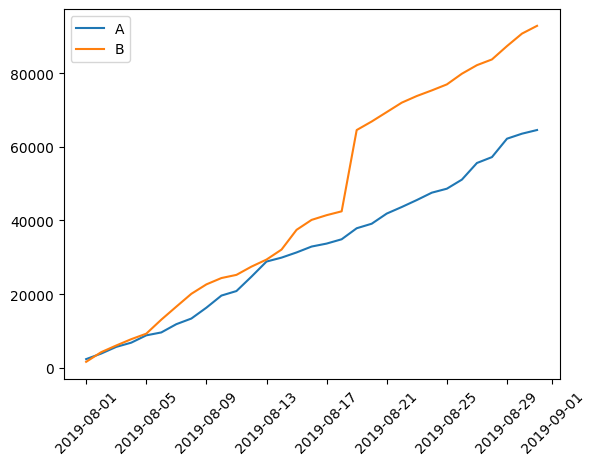

In [14]:
#GRAFICAR
cumulative_revenueA=cumulative_data[cumulative_data['group']=='A'][['date','revenue','orders']]
cumulative_revenueB=cumulative_data[cumulative_data['group']=='B'][['date','revenue','orders']]
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'],label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'],label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show;

<div class="alert alert-block alert-success">
<b>Celda [14]</b> <a class="tocSkip"></a><br>
La visualización de los ingresos acumulados por grupo es clara y efectiva. Has utilizado correctamente las etiquetas y la leyenda para diferenciar los grupos, lo que facilita la interpretación de los resultados. Esta representación gráfica permite observar tendencias y comparaciones entre los grupos de manera intuitiva.
</div>


In [15]:
#dateGroup=ordenes[['date', 'group']].drop_duplicates()ordenes_agregadas=dateGroup.apply(lambda x: ordenes[np.logical_and(ordenes['date']<= x['date']) ,(ordenes['group']==x['group'])].agg({'date':'max',
                                                                                                                               #'group':'max',
                                                                                                                              #'revenue':'sum'}), axis=1).sortvalues(by=['date','group'])
#ordenes_agregadas

In [16]:
revenue_acomulado=ordenes_agregadas.pivot(index='date',columns='group',values='revenue')
revenue_acomulado

group,A,B
date,,
2019-08-01,2356.8,1620.0
2019-08-02,3860.3,4243.8
2019-08-03,5675.5,6050.6
2019-08-04,6822.1,7767.9
2019-08-05,8810.2,9262.9
2019-08-06,9600.0,13069.3
2019-08-07,11842.9,16600.8
2019-08-08,13373.3,20088.6
2019-08-09,16320.4,22646.7


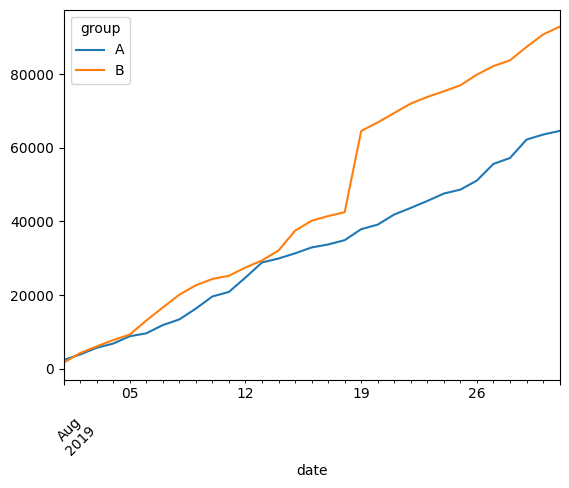

In [17]:
#GRAFICADE GANACIAS REVENUE ACOMULADO
revenue_acomulado.plot()

#plt.label()
plt.xticks(rotation=45)
plt.show()

## 2.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

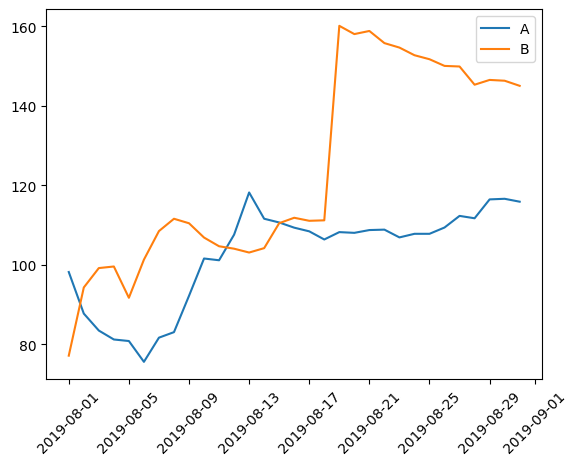

In [18]:
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/ cumulative_revenueA['orders'],label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/ cumulative_revenueB['orders'],label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
Al graficar el ingreso promedio por pedido, asegúrate de incluir etiquetas de ejes y un título para que la gráfica sea más comprensible para el lector. Esto ayudará a contextualizar la información presentada y a resaltar las diferencias en el ingreso promedio por pedido entre los grupos A y B.
</div>


## 2.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [19]:
mergedCumulativeRev=cumulative_revenueA.merge(
    cumulative_revenueB,left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeRev



,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101
5,2019-08-06,9600.0,127,13069.3,129
6,2019-08-07,11842.9,145,16600.8,153
7,2019-08-08,13373.3,161,20088.6,180
8,2019-08-09,16320.4,177,22646.7,205
9,2019-08-10,19608.6,193,24367.1,228


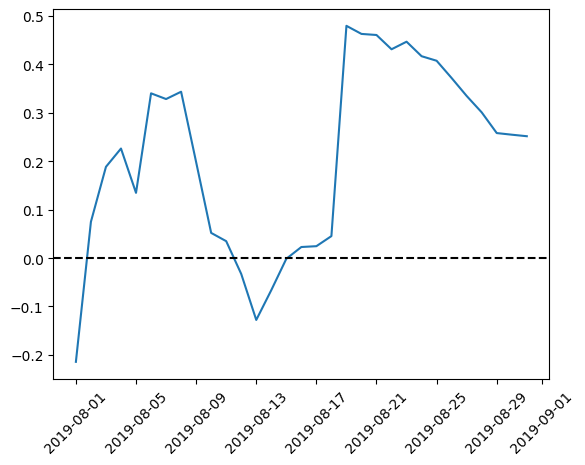

In [20]:
plt.plot(mergedCumulativeRev['date'], (
    mergedCumulativeRev['revenueB']/mergedCumulativeRev['ordersB'])/
        (mergedCumulativeRev['revenueA']/mergedCumulativeRev['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [20]</b> <a class="tocSkip"></a><br>
La gráfica que compara la relación de ingresos promedio entre los grupos A y B es una excelente manera de visualizar las diferencias en el rendimiento de los grupos. Esta comparación directa permite identificar rápidamente cuál grupo está generando más ingresos por pedido, lo cual es esencial para el análisis de experimentos A/B.
</div>


## 2.4Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [21]:
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


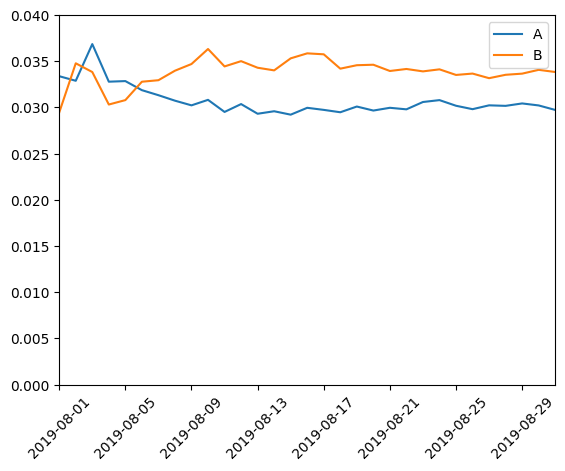

In [22]:
cumulative_data['convercion']=cumulative_data['orders']/ cumulative_data['visitors']
cumulative_dataA=cumulative_data[cumulative_data['group']=='A']
cumulative_dataB=cumulative_data[cumulative_data['group']=='B']

star_date= pd.to_datetime('2019-08-01')
end_date= pd.to_datetime('2019-08-31')

plt.plot(cumulative_dataA['date'], cumulative_dataA['convercion'],label='A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['convercion'],label='B')
plt.legend()
plt.axis([star_date, end_date, 0, 0.04])
plt.xticks(rotation=45)
plt.show;

<div class="alert alert-block alert-warning">
<b>Celda [22]</b> <a class="tocSkip"></a><br>
La representación de la tasa de conversión acumulada es adecuada, pero sería beneficioso incluir un análisis sobre cómo esta métrica afecta las decisiones del negocio. Comprender la tasa de conversión puede proporcionar información valiosa sobre la efectividad de las estrategias de marketing y ventas implementadas.
</div>


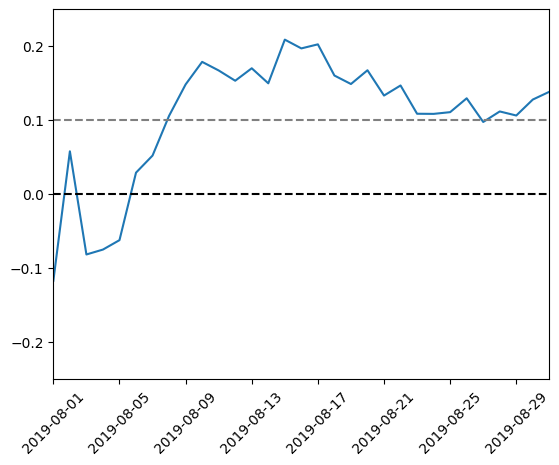

In [23]:
 merged_cumulative_convert=cumulative_dataA[['date','convercion']].merge(
     cumulative_dataB[['date','convercion']],left_on='date',right_on='date',how='left',suffixes=['A','B'])
plt.plot(merged_cumulative_convert['date'],merged_cumulative_convert['convercionB']/merged_cumulative_convert['convercionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([star_date, end_date, -0.25,0.25])
plt.xticks(rotation=45)
plt.show;

In [24]:
merged_cumulative_convert

,date,convercionA,convercionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793
5,2019-08-06,0.031870,0.032783
6,2019-08-07,0.031324,0.032946
7,2019-08-08,0.030731,0.033975
8,2019-08-09,0.030225,0.034699
9,2019-08-10,0.030821,0.036323


## 2.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [25]:
ordenes

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [26]:
ordenes_compradores=ordenes.drop(['group','revenue','date'], axis=1).groupby(
    'visitorId', as_index=False).agg({'transactionId':'nunique'})
ordenes_compradores.columns=['userId','orders']
display(ordenes_compradores.sort_values(by='orders', ascending=False).head())
x_values=pd.Series(range(0, len(ordenes_compradores)))


,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


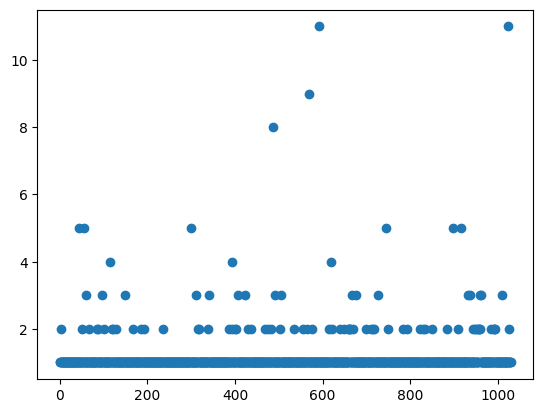

In [27]:
plt.scatter(x_values, ordenes_compradores['orders'])
plt.show()

## 2.6 Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [28]:
np.percentile(ordenes_compradores['orders'],[90,95,99])

array([1., 2., 4.])

<div class="alert alert-block alert-warning">
<b>Celda [28]</b> <a class="tocSkip"></a><br>
Los percentiles calculados para las órdenes son útiles para identificar valores atípicos. Considera utilizar estos valores para definir un umbral más claro para la detección de anomalías. Esto te permitirá establecer criterios objetivos para filtrar datos extremos que podrían sesgar el análisis.
</div>


In [29]:
ordenes_compradores['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

In [30]:
#buscar anomalias
ordenes.sort_values(by='revenue', ascending=False).head(10)


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A


In [31]:
ordenes_compradores.head(10)

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
5,47206413,1
6,48147722,1
7,54447517,1
8,56960363,1
9,66685450,1


<AxesSubplot:ylabel='Frequency'>

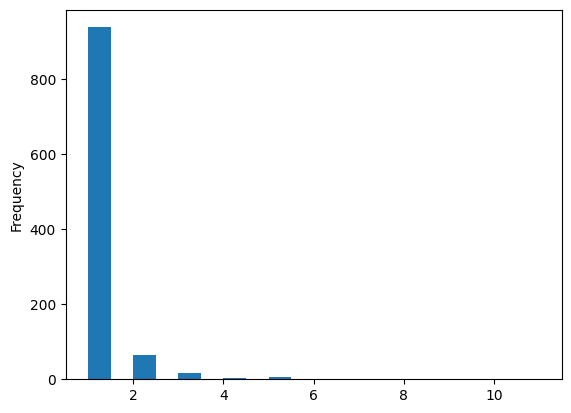

In [32]:
ordenes_compradores['orders'].plot(kind='hist', bins=20)

In [33]:
#buscar anomalias
ordenes.sort_values(by='revenue', ascending=False).head(10)


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A


## 2.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

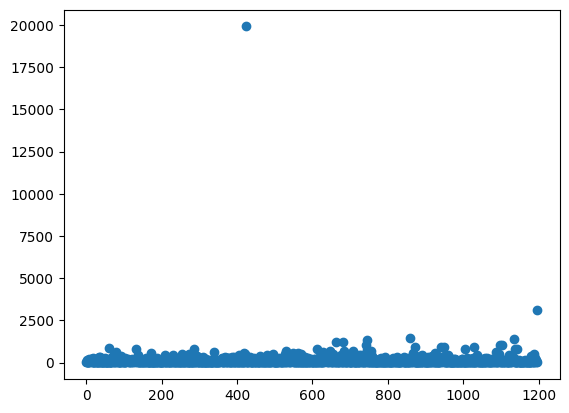

In [34]:
x_values= pd.Series(range(0, len(ordenes['revenue'])))
plt.scatter(x_values, ordenes['revenue'])

(0.0, 1210.0, 0.0, 1500.0)

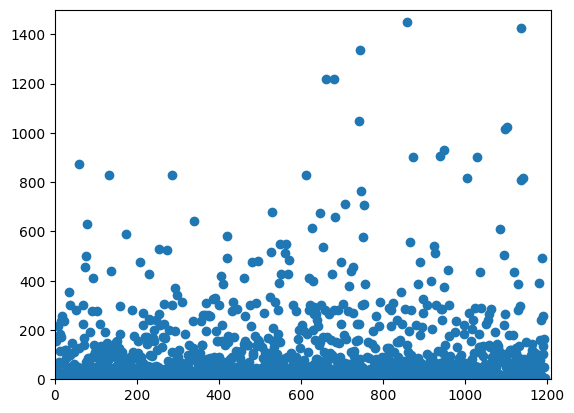

In [35]:
#mismagrafica pero mas de cerca 
plt.scatter(x_values, ordenes['revenue'])
plt.axis([0, 1210, 0, 1500])

## 2.8 Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [36]:
#lista de percenciles
np.percentile(ordenes['revenue'],[90,95,99])


array([282.48 , 435.54 , 900.904])

## 2.9 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [37]:
ordenes

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [38]:
#ordenes de usuarios A
ordersByUsersA = ordenes[ordenes['group']=='A'] 
ordersByUsersA.head() 


,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,10.2,A
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A


In [39]:
ordersByUsersA=ordersByUsersA.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns =['visitorId', 'orders']
ordersByUsersA.head()

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [40]:
#ordenes de usuarios B
ordersByUsersB = ordenes[ordenes['group']=='B'] 
ordersByUsersB.head() 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [41]:
ordersByUsersB=ordersByUsersB.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns =['visitorId', 'orders']
ordersByUsersB.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [42]:
#visitantes

In [43]:
SampleA=pd.concat(
    [ordersByUsersA['orders'], pd.Series(0, index=np.arange(
        visitantes[visitantes['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0) 
SampleA

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18736, dtype: int64

In [44]:
SampleB=pd.concat(
    [ordersByUsersB['orders'], pd.Series(0, index=np.arange(
        visitantes[visitantes['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0) 
SampleB

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18916, dtype: int64

In [45]:
#significancia estadistica#pvalñue#el mantweney
print("{0:.5f}".format(stats.mannwhitneyu(SampleA,SampleB)[1]))
print("{0:.3f}".format(SampleB.mean()/SampleA.mean()-1))

0.01679
0.138


<div class="alert alert-block alert-success">
<b>Celda [45]</b> <a class="tocSkip"></a><br>
La prueba de Mann-Whitney U ha sido implementada correctamente para evaluar la significancia estadística entre los grupos. Esto es crucial para validar las diferencias observadas en los datos, asegurando que no sean producto del azar sino de variaciones significativas en el comportamiento de los grupos.
</div>


## 2.10 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [46]:
#percentil
#pvalue
print("{0:3f}".format(stats.mannwhitneyu(ordenes[ordenes['group']=='A']['revenue'],ordenes[ordenes['group']=='B']['revenue'])[1]))
print("{:3f}".format(ordenes[ordenes['group']=='B']['revenue'].mean()/ordenes[ordenes['group']=='A']['revenue'].mean()-1))

0.691525
0.251653


In [47]:
print("{0:3f}".format(stats.mannwhitneyu(merged_cumulative_convert['convercionA'],merged_cumulative_convert['convercionB'])[1]))

0.000000


In [48]:
visitas1=ordersByUsersA[ordersByUsersA['orders'] > 2 ]['visitorId']
visttas2=ordersByUsersB[ordersByUsersB['orders']>2]['visitorId']

In [49]:
#Usuarios Anormales
usersWithManyOrders= pd.concat([visitas1, visttas2 ], axis=0)
usersWithManyOrders

                               

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
227    2038680547
237    2108163459
269    2378935119
278    2458001652
349    2988190573
456    3908431265
467    3967698036
499    4256040402
37      249864742
68      457167155
284    2038680547
326    2378935119
340    2458001652
360    2587333274
382    2742574263
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: visitorId, dtype: int64

In [50]:

userWithExpensiveOrders= ordenes[ordenes['revenue']>430]['visitorId']
userWithExpensiveOrders



60      4256040402
73      2947100995
77       787824685
78      3288820196
131     2254586615
           ...    
1136    1307669133
1137     759473111
1142    2606908679
1189     393266494
1196    2108080724
Name: visitorId, Length: 61, dtype: int64

In [51]:
abnormalUsers=pd.concat([usersWithManyOrders, userWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

## 2.11 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [52]:
#np.logical
sampleAFiltered= pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(visitantes[visitantes['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18690, dtype: int64

In [53]:
sampleBFiltered= pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(visitantes[visitantes['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18868, dtype: int64

In [54]:
print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01418
0.171


In [55]:
visitantes

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


## 2.12 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [56]:
grupoA = ordenes[
    (ordenes['group'] == 'A') &
    (~ordenes['visitorId'].isin(abnormalUsers))
]['revenue']
grupoA

2        10.2
7        20.1
8       215.9
10       65.7
12      115.4
        ...  
1185     15.2
1187     15.5
1188      5.7
1193     50.1
1194    165.3
Name: revenue, Length: 473, dtype: float64

In [57]:
grupoB = ordenes[
    (ordenes['group'] == 'B') &
    (~ordenes['visitorId'].isin(abnormalUsers))
]['revenue']
grupoB

0        30.4
1        15.2
3       155.1
4        40.5
5        35.0
        ...  
1184    160.7
1186    240.6
1190    135.3
1191    255.7
1192    100.8
Name: revenue, Length: 559, dtype: float64

In [58]:
# Filtrar usuarios normales del grupo A
grupoA = ordenes[
    (ordenes['group'] == 'A') &
    (~ordenes['visitorId'].isin(abnormalUsers))
]['revenue']

# Filtrar usuarios normales del grupo B
grupoB = ordenes[
    (ordenes['group'] == 'B') &
    (~ordenes['visitorId'].isin(abnormalUsers))
]['revenue']

# Prueba de Mann-Whitney U
print("{0:.3f}".format(stats.mannwhitneyu(grupoA, grupoB)[1]))

# Diferencia relativa de ingresos promedio entre grupos
print("{0:.3f}".format(grupoB.mean() / grupoA.mean() - 1))

0.750
-0.027


<div class="alert alert-block alert-success">
<b>Celda [58]</b> <a class="tocSkip"></a><br>
Has realizado un buen trabajo al filtrar los usuarios anómalos antes de realizar la prueba estadística. Esto asegura que las conclusiones sean más precisas y no estén sesgadas por valores extremos. Al eliminar estos valores atípicos, te aseguras de que el análisis refleje mejor el comportamiento típico de los usuarios.
</div>


## 2.13 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

optare por 
# 1. Parar la prueba, considerar a uno de los grupos como líder. 


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Hiram! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Calculaste correctamente las métricas ICE y RICE para priorizar hipótesis, lo que te permitió evaluar las hipótesis de manera efectiva.<br>
• Inspeccionaste de manera completa la estructura de los datos, asegurando que estuvieran listos para el análisis.<br>
• Realizaste una conversión adecuada de fechas al tipo `datetime`, lo cual es crucial para el análisis temporal.<br>
• Agregaste datos de manera efectiva para el análisis, lo que facilitó la interpretación de los resultados.<br>
• Visualizaste los ingresos acumulados de manera clara, permitiendo una fácil comparación entre grupos.<br>
• Comparaste la relación de ingresos promedio entre grupos de forma efectiva, destacando diferencias clave.<br>
• Implementaste la prueba de Mann-Whitney U correctamente, asegurando la validez estadística de tus hallazgos.<br>
• Filtraste usuarios anómalos para asegurar la precisión de las pruebas, evitando sesgos en los resultados.<br>
• Calculaste percentiles para identificar valores atípicos, mejorando la calidad del análisis de datos.<br>
• Proporcionaste visualizaciones útiles para la interpretación de resultados, facilitando la comunicación de tus hallazgos.<br>
¡Felicidades!
</div>
